# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Sani Trisnawan
- **Email:** m312d4ky2542@bangkit.academy
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- Bagaimana sebaran peminjam sepeda berdasarkan musim?
- Bagaimana sebaran peminjam sepeda berdasarkan cuaca?
- Bagaimana perbandingan peminjam sepeda pada workingday?
- Bagaiana pola data jumlah peminjam sepeda?

## Import Semua Packages/Library yang Digunakan

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [6]:
df = pd.read_csv("C:/Users/Acer/Documents/Submission/Data/day.csv")
df2 = pd.read_csv("C:/Users/Acer/Documents/Submission/Data/hour.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
df2.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Melihat jumlah missing value pada data frame 1

In [8]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Melihat jumlah missing value pada data frame 2

In [9]:
df2.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Mencari tahu apakah terdapat data duplikat pada data frame 1

In [10]:
df.duplicated().sum()

0

Mencari tahu apakah terdapat data duplikat pada data frame 2

In [11]:
df2.duplicated().sum()

0

Informasi singkat tentang DataFrame

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Ringkasan statistik deskriptif DataFrame

In [14]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [15]:
df2.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Mengubah tipe data dteday menjadi datetime

In [16]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  df[column] = pd.to_datetime(df[column])

In [17]:
for column in datetime_columns:
  df2[column] = pd.to_datetime(df2[column])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis

In [19]:
df.groupby(by="season").cnt.sum().sort_values(ascending=False)

season
3    1061129
2     918589
4     841613
1     471348
Name: cnt, dtype: int64

In [20]:
df.groupby(by="weathersit").cnt.sum().sort_values(ascending=False)

weathersit
1    2257952
2     996858
3      37869
Name: cnt, dtype: int64

In [21]:
df.groupby(by="weekday").cnt.sum().sort_values(ascending=False)

weekday
5    487790
4    485395
6    477807
3    473048
2    469109
1    455503
0    444027
Name: cnt, dtype: int64

## Visualization & Explanatory Analysis

#### 1. Bagaimana sebaran peminjam sepeda berdasarkan musim?

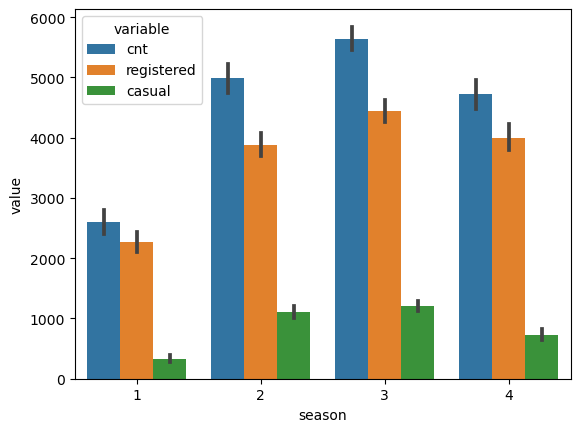

In [23]:
sns.barplot(data=df.melt(id_vars='season', value_vars=['cnt', 'registered', 'casual']), x="season", y="value", hue="variable")
plt.show()

#### 2. Bagaimana sebaran peminjam sepeda berdasarkan cuaca?

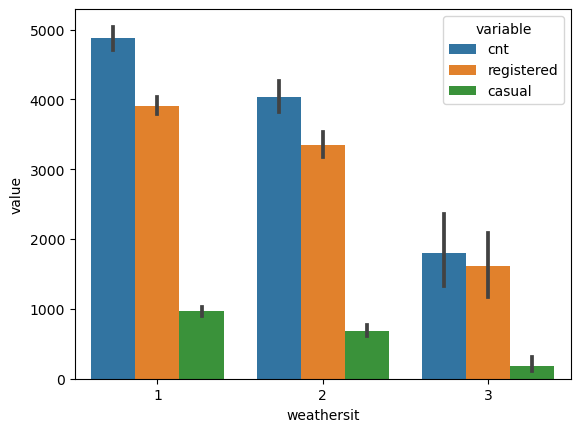

In [24]:
sns.barplot(data=df.melt(id_vars='weathersit', value_vars=['cnt', 'registered', 'casual']), x="weathersit", y="value", hue="variable")
plt.show()

#### 3. Bagaimana perbandingan peminjam sepeda pada workingday?

(-1.25, 1.25, -1.25, 1.25)

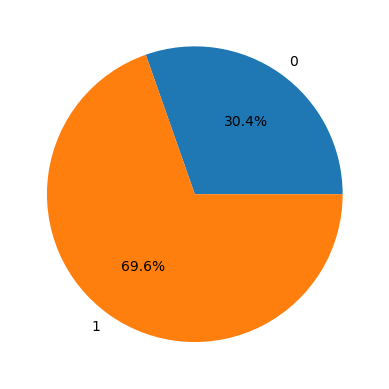

In [25]:
plt.pie(df.groupby('workingday').cnt.sum(), labels=df.groupby('workingday').cnt.sum().index, autopct='%1.1f%%')
plt.axis()

In [26]:
df.to_csv("main_data.csv", index=False)

#### 4. Bagaimana pola data jumlah peminjam sepeda?

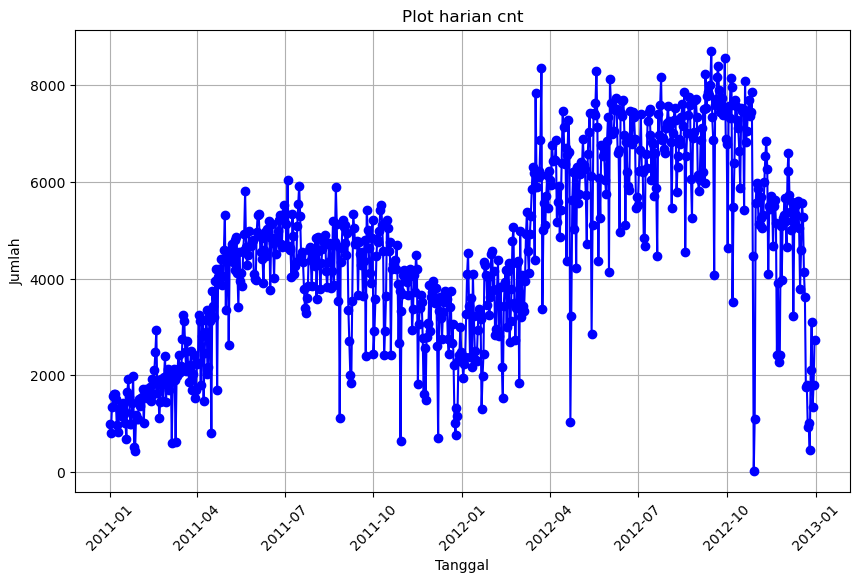

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(df['dteday'], df['cnt'], marker='o', color='b', linestyle='-')
plt.title('Plot harian cnt')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Conclusion

##### Pertanyaan 1: 
Pada diagram terlihat bahwa jumlah peminjam sepeda terbanyak ada pada musim 3 yaitu musim gugur (fall) dengan jumlah peminjam sepeda sebanyak lebih dari 1.000.000. Kemudian selanjutnya diikuti oleh musim 2, musim panas (summer), dan musim 4, musim dingin (winter), dengan jumlah lebih dari 800.000. Dan jumlah peminjam sepeda paling sedikit ada pada musim 1, musim semi (springer), dengan jumlah kurang dari 500.000.

##### Pertanyaan 2:
Pada diagram dapat disimpulkan beberapa hal yaitu,
 - Jumlah peminjam sepeda terbanyak ada pada cuaca 1 yaitu cuaca cerah, sedikit awan, berawan sebagian, dengan jumlah peminjam sepeda sebanyak lebih dari 2.000.000.
 - Kemudian selanjutnya diikuti oleh cuaca 2 yaitu cuaca kabut + berawan, kabut + awan pecah, kabut + sedikit awan, kabut dengan jumlah sekitar 900.000.
 - Selanjutnya ada cuaca 3 yaitu cuaca salju ringan, hujan ringan + badai petir + awan tersebar, hujan ringan + awan tersebar dengan jumlah kurang dari 50.000 .
 - Dan pada cuaca 4 yaitu cuaca hujan lebat + palet es + badai petir + kabut, salju + kabut, tidak terdapat peminjam sepeda.

##### Pertanyaan 3:
Pada pie chart terlihat bahwa bagian 1 yaitu workingday (hari kerja), memilik presentase peminjam sepeda sebesar 69,6%. Ini lebih banyak dibandingkan pada bagian 0 yaitu holiday (hari libur) yang hanya terdapat 30,4% peminjam sepeda.
- Saran : untuk penyedia jasa peminjam sepeda, bisa memberikan harga berbeda ketika workingday, dengan harga yang sedikit lebih tinggi daripada saat holiday yang memiliki tarif normal. Dengan cara ini, penyedia jasa akan mendapatkan lebih banyak keuntungan, karena konsumen cenderung lebih banyak menyewa sepeda pada saat workingday.

##### Pertanyaan 4:
Pada plot time series diatas, terlihat pola musiman yaitu tiap bulan 1, Januari, jumlah peminjam sepeda mengalami penurunan yang cukup signifikan daripada bulan yang lain. Hal ini bisa dikarenakan pada bulan Januari merupakan hari libur dan bukanlah hari kerja sehingga jumlah konsumen mengalami penurunan. Kesimpulan ini berbanding lurus dengan pertanyaan 3, dimana sudah diketahui bahwa jumlah peminjam sepeda pada hari libur hanya ada sebanyak 30,4% dibandingkan di hari kerja dengan presentase 69,6%.